**Linear Regression with PyTorch**

In [1]:
!wget -P sample_data/ https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt

--2019-08-05 01:18:04--  https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘sample_data/ex1data1.txt.11’

ex1data1.txt.11     100%[===================>]   1.33K  --.-KB/s    in 0s      

2019-08-05 01:18:04 (235 MB/s) - ‘sample_data/ex1data1.txt.11’ saved [1359/1359]



**Data Exploratory**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
!ls sample_data/

anscombe.json		      ex1data1.txt.11  ex1data1.txt.7
california_housing_test.csv   ex1data1.txt.2   ex1data1.txt.8
california_housing_train.csv  ex1data1.txt.3   ex1data1.txt.9
ex1data1.txt		      ex1data1.txt.4   mnist_test.csv
ex1data1.txt.1		      ex1data1.txt.5   mnist_train_small.csv
ex1data1.txt.10		      ex1data1.txt.6   README.md


In [0]:
data = pd.read_csv('sample_data/ex1data1.txt', header=None, names=['Population', 'Profit'])

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


**Data Visualization**

In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [0]:
#data.plot(title='Scatter plot of Population vs Profit',kind='scatter', x='Population', y='Profit', color='red', figsize=(12,8))

** Building the model**

In [0]:
x_values = list(data['Population'])

In [9]:
x_values[:4]

[6.1101, 5.5277, 8.5186, 7.0032]

In [0]:
y_values = list(data['Profit'])

In [11]:
y_values[:4]

[17.592, 9.1302, 13.662, 11.854000000000001]

In [12]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
y_train = np.array(y_values, dtype=np.float32)
x_train.shape


(97,)

In [13]:
# Important: 2D required
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_train.shape

(97, 1)

**Building Model**

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
# Create class
class LinearRegressionModel(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self, x):
    out = self.linear(x)
    return out

**Instantiate Model Class**

In [0]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**

In [0]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**

In [0]:
#learning_rate = 0.01
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**

In [0]:
epochs = 600

In [20]:
for epoch in range(epochs):
  epoch += 1
  # Convert numpy array to torch Variable
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_train))
  
  # Clear the gradients w.r.t. parameters
  optimizer.zero_grad()
  
  # Forward to get output
  outputs = model(inputs)
  
  # Claculate Loss
  loss = criterion(outputs, labels)
  
  # Getting gradients w.r.t. parameters
  loss.backward()
  
  # Updating parameters
  optimizer.step()
  
  #print('epoch {}, loss {}'.format(epoch, loss.data[0]))
  print('epoch {}, loss {}'.format(epoch, loss.item()))
  #print('epoch {}'.format(epoch))
  

epoch 1, loss 138.08641052246094
epoch 2, loss 64.64118957519531
epoch 3, loss 34.121238708496094
epoch 4, loss 21.430219650268555
epoch 5, loss 16.144485473632812
epoch 6, loss 13.934623718261719
epoch 7, loss 13.002413749694824
epoch 8, loss 12.600974082946777
epoch 9, loss 12.42009162902832
epoch 10, loss 12.330918312072754
epoch 11, loss 12.279935836791992
epoch 12, loss 12.244917869567871
epoch 13, loss 12.216629981994629
epoch 14, loss 12.191234588623047
epoch 15, loss 12.167141914367676
epoch 16, loss 12.143684387207031
epoch 17, loss 12.120590209960938
epoch 18, loss 12.097742080688477
epoch 19, loss 12.075090408325195
epoch 20, loss 12.052617073059082
epoch 21, loss 12.03031063079834
epoch 22, loss 12.008166313171387
epoch 23, loss 11.986184120178223
epoch 24, loss 11.964359283447266
epoch 25, loss 11.942692756652832
epoch 26, loss 11.921180725097656
epoch 27, loss 11.899825096130371
epoch 28, loss 11.878622055053711
epoch 29, loss 11.857571601867676
epoch 30, loss 11.83667373

**Plot Graph**

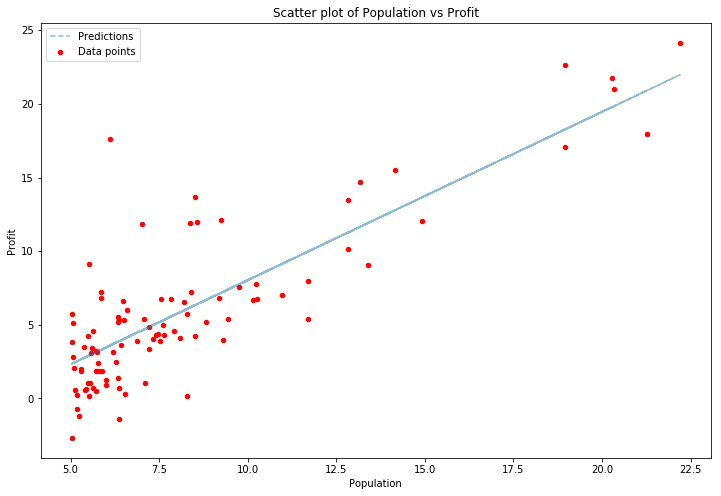

In [21]:
# Clear Figure
#plt.clf()

#Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()


#plt.plot(x_train, y_train, 'r--', x_train, predicted, 'bs')

# Plot true data
#plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

data.plot(label='Data points', title='Scatter plot of Population vs Profit',kind='scatter', x='Population', y='Profit', color='red', figsize=(12,8))

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

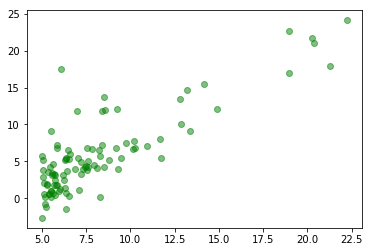

In [22]:
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)